In [1]:
import pandas as pd

# 파일 불러오기
file_path = r"C:\Users\m\Downloads\매출-안정성 데이터_병합완료.csv"
df = pd.read_csv(file_path, encoding="utf-8")

# 랜덤 샘플링 (1000개)
sample_df = df.sample(n=1000, random_state=42)  # random_state는 재현성을 위해 설정

# 샘플 데이터 확인
print(sample_df.head())

          연분기          상권명   업종명  점포_수  유사_업종_점포_수  개업율  개업_점포_수  폐업률  \
753602  20211       노원역 9번  육류판매     1           1    0        0    0   
832238  20214       경리단길북측   PC방     1           1    0        0    0   
815757  20214    왕십리역(왕십리)  예술학원     5           5    0        0    0   
360392  20202  포이사거리(삼호물산)   사진관    35          35    3        1    0   
281292  20223      청량리수산시장    완구     1           1    0        0    0   

        폐업_점포_수  프랜차이즈_점포_수  ... 점포_유지율  점포_증가율  영업_지속_기간_평균  개폐업_균형_지수  \
753602        0           0  ...      1     0.0     0.478723        NaN   
832238        0           0  ...      1     0.0     0.479167        NaN   
815757        0           0  ...      1     0.0     0.479167        NaN   
360392        0           0  ...      1     0.0     0.467391        1.0   
281292        0           0  ...      1     0.0     0.494949        NaN   

       점포_안정성_지수  프랜차이즈_비율  프랜차이즈_안정성_반영_지수      당월_매출_금액   당월_매출_건수  \
753602         1       0.0            

새 안정성 변수 생성

In [2]:
import pandas as pd
import numpy as np

# 파일 불러오기
file_path = r"C:\Users\m\Downloads\매출-안정성 데이터_병합완료.csv"
df = pd.read_csv(file_path, encoding="utf-8")

# NaN 값 처리 (이전 값으로 채우기 또는 0으로 대체)
df.fillna(method="ffill", inplace=True)  # 이전 값으로 채움 (같은 상권, 업종일 가능성 고려)
df.fillna(0, inplace=True)  # 남은 NaN 값은 0으로 대체

# 새로운 안정성 변수 생성
df["매출_금액_평균_증감률"] = df.groupby(["상권명", "업종명"])["당월_매출_금액_증감률"].transform("mean")
df["매출_금액_변동성"] = df.groupby(["상권명", "업종명"])["당월_매출_금액_증감률"].transform("std")

df["매출_건수_평균_증감률"] = df.groupby(["상권명", "업종명"])["당월_매출_건수_증감률"].transform("mean")
df["매출_건수_변동성"] = df.groupby(["상권명", "업종명"])["당월_매출_건수_증감률"].transform("std")

df["점포_증감_변동성"] = df.groupby(["상권명", "업종명"])["점포_증감량"].transform("std")

# 새로운 파일로 저장
output_path = r"C:\Users\m\Downloads\매출-안정성 데이터_추가완료.csv"
df.to_csv(output_path, encoding="utf-8-sig", index=False)

print(f"파일 저장 완료: {output_path}")

C:\Users\m\AppData\Local\Temp\ipykernel_11480\4224326052.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)  # 이전 값으로 채움 (같은 상권, 업종일 가능성 고려)


파일 저장 완료: C:\Users\m\Downloads\매출-안정성 데이터_추가완료.csv


상관관계 분석

c:\Users\m\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\m\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\m\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\m\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\m\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\m\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Us

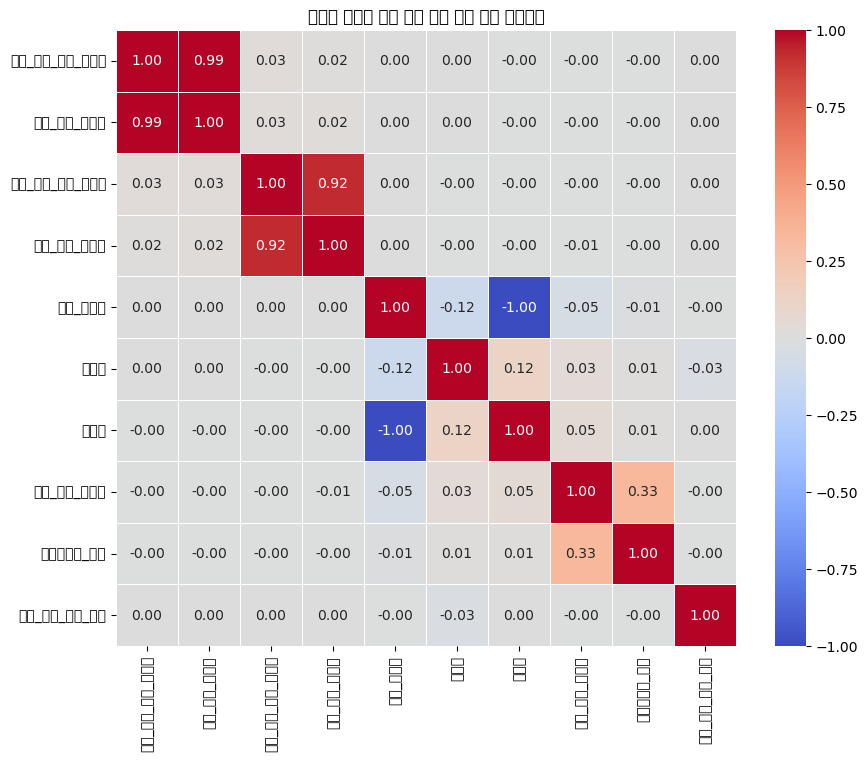

ValueError: x and y must have the same length.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 파일 불러오기
file_path = r"C:\Users\m\Downloads\매출-안정성 데이터_추가완료.csv"
df = pd.read_csv(file_path, encoding="utf-8")

# 분석할 변수 선택
stability_vars = [
    "매출_금액_평균_증감률", "매출_금액_변동성", "매출_건수_평균_증감률", "매출_건수_변동성",
    "점포_유지율", "개업율", "폐업률", "점포_증감_변동성", "프랜차이즈_비율"
]

# 상관관계 계산
correlation_matrix = df[stability_vars + ["영업_지속_기간_평균"]].corr()

# Heatmap 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("안정성 변수와 영업 지속 기간 평균 간의 상관관계")
plt.show()

# 개별 변수별 p-value 계산 (유의미한지 검정)
p_values = {}
for var in stability_vars:
    corr, p_val = pearsonr(df[var].dropna(), df["영업_지속_기간_평균"].dropna())
    p_values[var] = p_val

# p-value 출력
p_values_df = pd.DataFrame.from_dict(p_values, orient="index", columns=["p-value"])
print("각 변수의 p-value (유의수준 0.05 이하이면 유의미함):")
print(p_values_df)

c:\Users\m\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\m\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\m\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\m\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\m\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\m\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Us

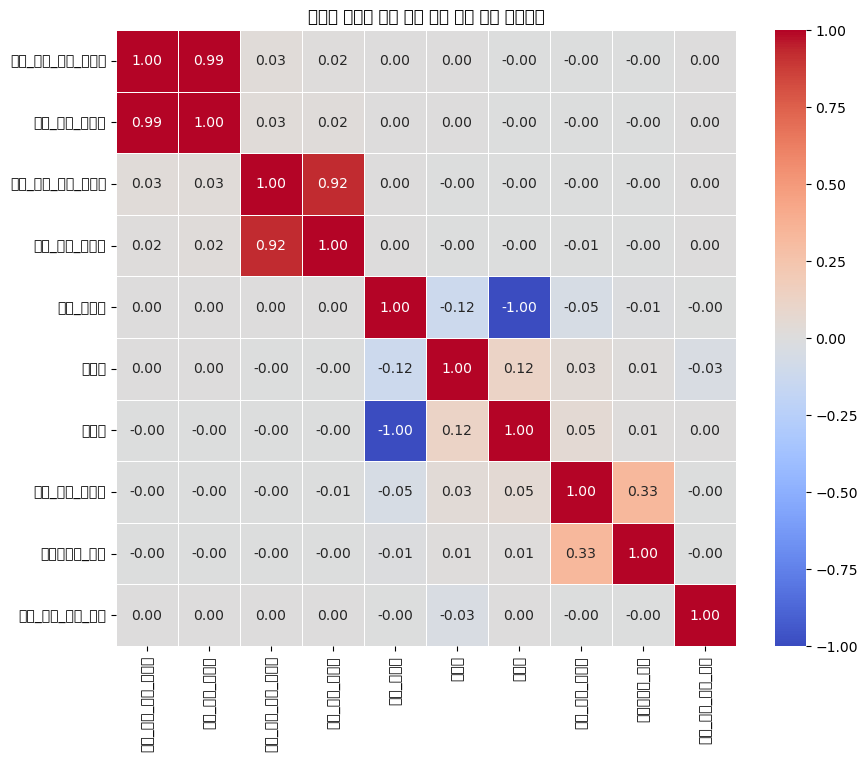

각 변수의 p-value (유의수준 0.05 이하이면 유의미함):
                   p-value
매출_금액_평균_증감률  9.668344e-04
매출_금액_변동성     2.046281e-03
매출_건수_평균_증감률  2.650520e-01
매출_건수_변동성     6.315402e-01
점포_유지율        2.080174e-02
개업율           0.000000e+00
폐업률           2.080174e-02
점포_증감_변동성     1.762263e-03
프랜차이즈_비율      3.508781e-07


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 파일 불러오기 (한글 깨짐 방지)
file_path = r"C:\Users\m\Downloads\매출-안정성 데이터_추가완료.csv"
df = pd.read_csv(file_path, encoding="utf-8-sig")

# 분석할 변수 선택
stability_vars = [
    "매출_금액_평균_증감률", "매출_금액_변동성", "매출_건수_평균_증감률", "매출_건수_변동성",
    "점포_유지율", "개업율", "폐업률", "점포_증감_변동성", "프랜차이즈_비율"
]

# NaN이 있는 행 제거 (두 개의 컬럼을 함께 고려)
df_clean = df.dropna(subset=stability_vars + ["영업_지속_기간_평균"])

# 상관관계 계산
correlation_matrix = df_clean[stability_vars + ["영업_지속_기간_평균"]].corr()

# Heatmap 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("안정성 변수와 영업 지속 기간 평균 간의 상관관계")
plt.show()

# 개별 변수별 p-value 계산 (유의미한지 검정)
p_values = {}
for var in stability_vars:
    corr, p_val = pearsonr(df_clean[var], df_clean["영업_지속_기간_평균"])
    p_values[var] = p_val

# p-value 출력
p_values_df = pd.DataFrame.from_dict(p_values, orient="index", columns=["p-value"])
print("각 변수의 p-value (유의수준 0.05 이하이면 유의미함):")
print(p_values_df)

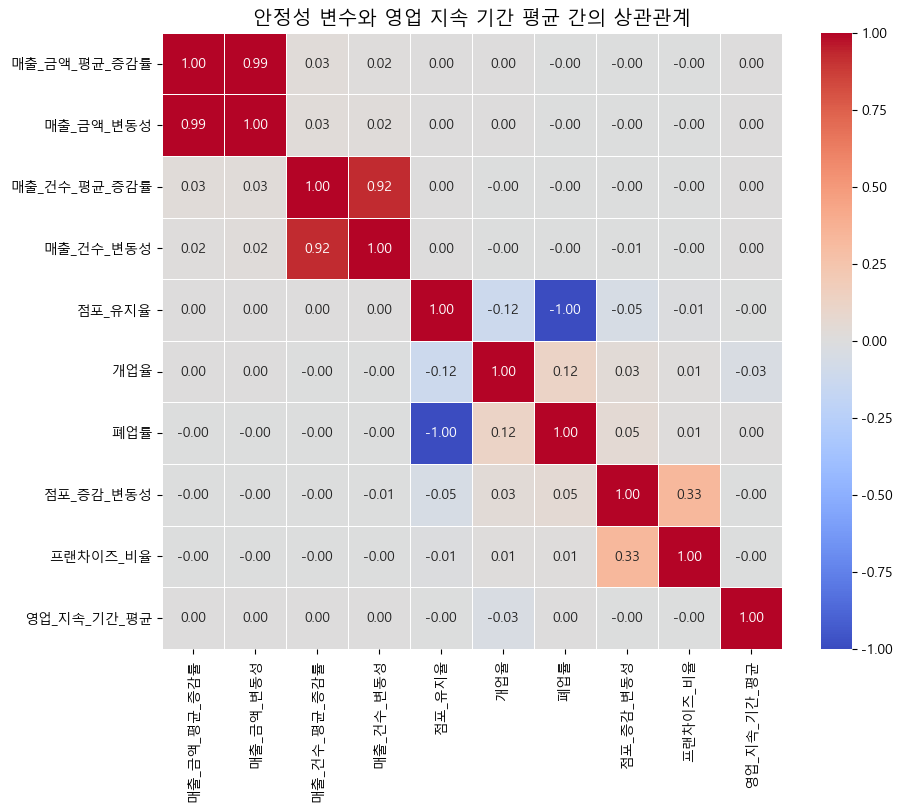

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Windows 기준: 맑은 고딕)
plt.rc("font", family="Malgun Gothic")

# (Mac 사용자의 경우 아래 코드 사용)
# plt.rc("font", family="AppleGothic")

# 음수 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

# 파일 불러오기 (한글 깨짐 방지)
file_path = r"C:\Users\m\Downloads\매출-안정성 데이터_추가완료.csv"
df = pd.read_csv(file_path, encoding="utf-8-sig")

# 분석할 변수 선택
stability_vars = [
    "매출_금액_평균_증감률", "매출_금액_변동성", "매출_건수_평균_증감률", "매출_건수_변동성",
    "점포_유지율", "개업율", "폐업률", "점포_증감_변동성", "프랜차이즈_비율"
]

# NaN이 있는 행 제거
df_clean = df.dropna(subset=stability_vars + ["영업_지속_기간_평균"])

# 상관관계 계산
correlation_matrix = df_clean[stability_vars + ["영업_지속_기간_평균"]].corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("안정성 변수와 영업 지속 기간 평균 간의 상관관계", fontsize=14)
plt.show()

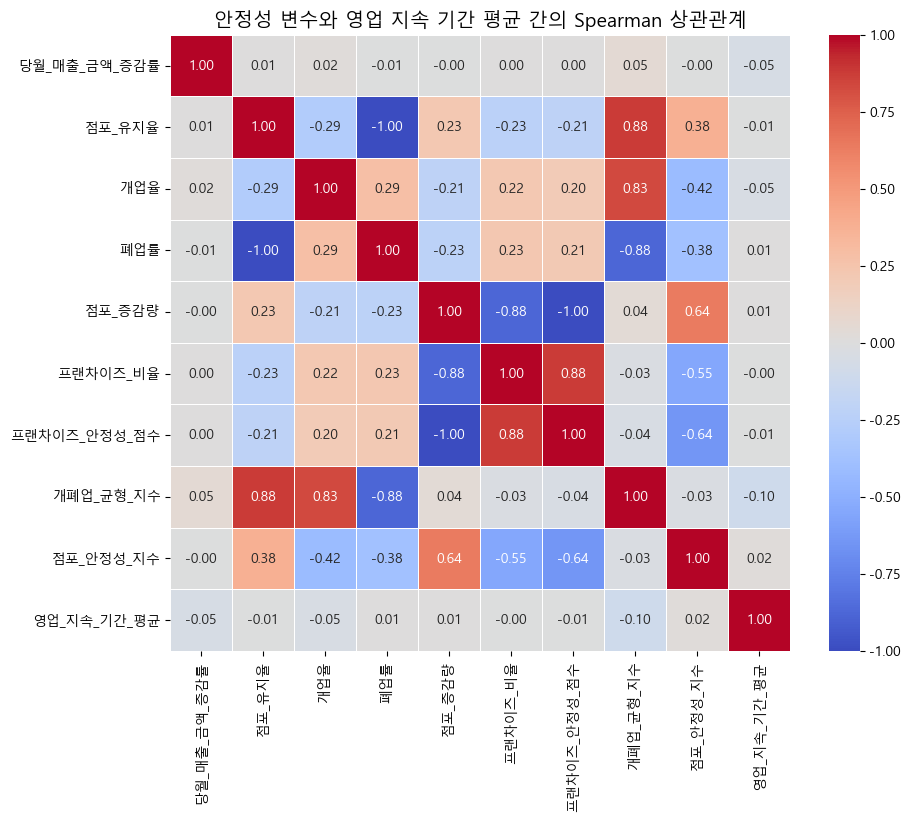

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기 (한글 인코딩 고려)
df = pd.read_csv("C:/Users/m/Downloads/매출-안정성 데이터_병합완료.csv", encoding="utf-8")

# 컬럼명 공백 제거
df.columns = df.columns.str.strip()

# 안정성 변수 목록 (실제 컬럼명 기반)
stability_vars = [
    "당월_매출_금액_증감률", "점포_유지율", "개업율", "폐업률", "점포_증감량",
    "프랜차이즈_비율", "프랜차이즈_안정성_점수", "개폐업_균형_지수", "점포_안정성_지수"
]

# 안정성 변수 중 실제 존재하는 컬럼만 필터링
valid_vars = [col for col in stability_vars if col in df.columns]

# Spearman 상관계수 계산
spearman_corr = df[valid_vars + ["영업_지속_기간_평균"]].corr(method="spearman")

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("안정성 변수와 영업 지속 기간 평균 간의 Spearman 상관관계", fontsize=14)
plt.show()

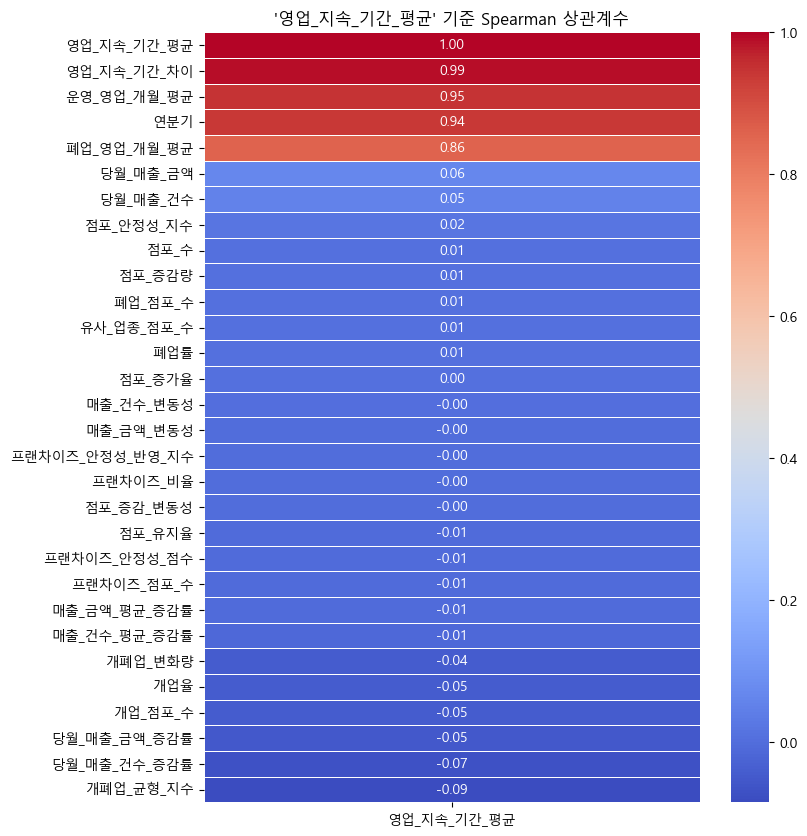


📊 '영업_지속_기간_평균'과 가장 높은 상관관계 변수 TOP 5:
영업_지속_기간_평균    1.000000
영업_지속_기간_차이    0.988709
운영_영업_개월_평균    0.945003
연분기            0.936472
폐업_영업_개월_평균    0.859591
Name: 영업_지속_기간_평균, dtype: float64

📉 '영업_지속_기간_평균'과 가장 낮은 상관관계 변수 BOTTOM 5:
개업율            -0.045360
개업_점포_수        -0.045446
당월_매출_금액_증감률   -0.053945
당월_매출_건수_증감률   -0.070442
개폐업_균형_지수      -0.085381
Name: 영업_지속_기간_평균, dtype: float64


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 파일 경로 설정
file_path = r"C:\Users\m\Downloads\매출-안정성 데이터_추가완료.csv"

# 데이터 로드
df = pd.read_csv(file_path)

# 분석 대상 변수
target_col = "영업_지속_기간_평균"

# 숫자형 변수만 선택
numeric_cols = df.select_dtypes(include=['number']).columns

# 상관계수 계산 (Spearman)
correlation_matrix = df[numeric_cols].corr(method='spearman')

# 타겟 변수와의 상관관계 추출
correlation_with_target = correlation_matrix[target_col].sort_values(ascending=False)

# 히트맵 시각화
plt.figure(figsize=(8, 10))
sns.heatmap(correlation_with_target.to_frame(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title(f"'{target_col}' 기준 Spearman 상관계수")
plt.show()

# 상위/하위 상관관계 출력
print("\n📊 '영업_지속_기간_평균'과 가장 높은 상관관계 변수 TOP 5:")
print(correlation_with_target.head(5))

print("\n📉 '영업_지속_기간_평균'과 가장 낮은 상관관계 변수 BOTTOM 5:")
print(correlation_with_target.tail(5))


📌 Pearson 상관계수 분석 결과

🔼 가장 높은 상관관계 TOP 5:
영업_지속_기간_평균    1.000000
영업_지속_기간_차이    0.968550
운영_영업_개월_평균    0.931642
연분기            0.886078
폐업_영업_개월_평균    0.790741
Name: 영업_지속_기간_평균, dtype: float64

🔽 가장 낮은 상관관계 BOTTOM 5:
프랜차이즈_점포_수   -0.006758
개업_점포_수      -0.027302
개업율          -0.029413
개폐업_변화량      -0.035785
개폐업_균형_지수    -0.082533
Name: 영업_지속_기간_평균, dtype: float64

📌 Spearman 상관계수 분석 결과

🔼 가장 높은 상관관계 TOP 5:
영업_지속_기간_평균    1.000000
영업_지속_기간_차이    0.988709
운영_영업_개월_평균    0.945003
연분기            0.936472
폐업_영업_개월_평균    0.859591
Name: 영업_지속_기간_평균, dtype: float64

🔽 가장 낮은 상관관계 BOTTOM 5:
개업율            -0.045360
개업_점포_수        -0.045446
당월_매출_금액_증감률   -0.053945
당월_매출_건수_증감률   -0.070442
개폐업_균형_지수      -0.085381
Name: 영업_지속_기간_평균, dtype: float64

📌 Kendall 상관계수 분석 결과

🔼 가장 높은 상관관계 TOP 5:
영업_지속_기간_평균    1.000000
영업_지속_기간_차이    0.962456
운영_영업_개월_평균    0.841334
연분기            0.816825
폐업_영업_개월_평균    0.717028
Name: 영업_지속_기간_평균, dtype: float64

🔽 가장 낮은 상관관계 BOTTOM 5:
개업율            -0.037499
당월_

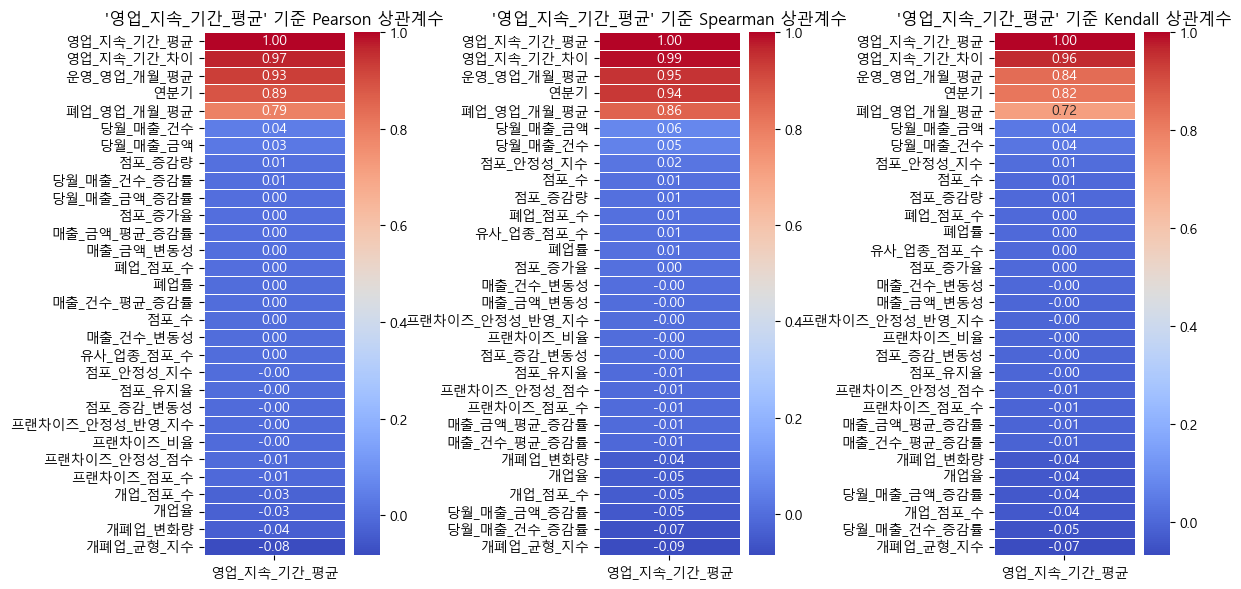

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 파일 경로 설정
file_path = r"C:\Users\m\Downloads\매출-안정성 데이터_추가완료.csv"

# 데이터 로드
df = pd.read_csv(file_path)

# 분석 대상 변수
target_col = "영업_지속_기간_평균"

# 숫자형 변수만 선택
numeric_cols = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_cols]

# 다양한 상관계수 계산
correlation_methods = ["pearson", "spearman", "kendall"]
correlation_results = {}

for method in correlation_methods:
    correlation_matrix = df_numeric.corr(method=method)
    correlation_results[method] = correlation_matrix[target_col].sort_values(ascending=False)

# 각 상관계수별 상위/하위 5개 변수 출력
for method, correlation_series in correlation_results.items():
    print(f"\n📌 {method.capitalize()} 상관계수 분석 결과")
    print("\n🔼 가장 높은 상관관계 TOP 5:")
    print(correlation_series.head(5))
    print("\n🔽 가장 낮은 상관관계 BOTTOM 5:")
    print(correlation_series.tail(5))

# 상관계수 히트맵 시각화
plt.figure(figsize=(12, 6))
for i, method in enumerate(correlation_methods, 1):
    plt.subplot(1, 3, i)
    sns.heatmap(
        correlation_results[method].to_frame(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5
    )
    plt.title(f"'{target_col}' 기준 {method.capitalize()} 상관계수")

plt.tight_layout()
plt.show()

다중공선성 검사

c:\Users\m\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


📌 초기 VIF 결과:
             Feature           VIF
9       폐업_영업_개월_평균           inf
8       운영_영업_개월_평균           inf
2        유사_업종_점포_수  6.004800e+14
6           폐업_점포_수  3.216857e+14
11          개폐업_변화량  1.876500e+14
12      영업_지속_기간_차이  9.685160e+13
1              점포_수  4.619077e+13
13           점포_증감량  4.330384e+13
20         프랜차이즈_비율  2.460983e+13
21  프랜차이즈_안정성_반영_지수  1.071011e+13
4           개업_점포_수  5.594534e+12
7        프랜차이즈_점포_수  1.807948e+12
15           점포_유지율  4.647349e+09
5               폐업률  4.647347e+09
17      영업_지속_기간_평균  8.273225e+02
25     매출_금액_평균_증감률  8.257136e+01
26        매출_금액_변동성  8.238629e+01
16           점포_증가율  3.129375e+01
0               연분기  2.192225e+01
27     매출_건수_평균_증감률  6.772866e+00
28        매출_건수_변동성  6.701518e+00
23         당월_매출_건수  3.075925e+00
22         당월_매출_금액  2.997379e+00
29        점포_증감_변동성  2.539813e+00
19        점포_안정성_지수  1.727858e+00
14     프랜차이즈_안정성_점수  1.552203e+00
10     당월_매출_금액_증감률  1.187168e+00
3               개업율  1.167568e+00


c:\Users\m\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
C:\Users\m\AppData\Local\Temp\ipykernel_11480\3642523726.py:48: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\m\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\m\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


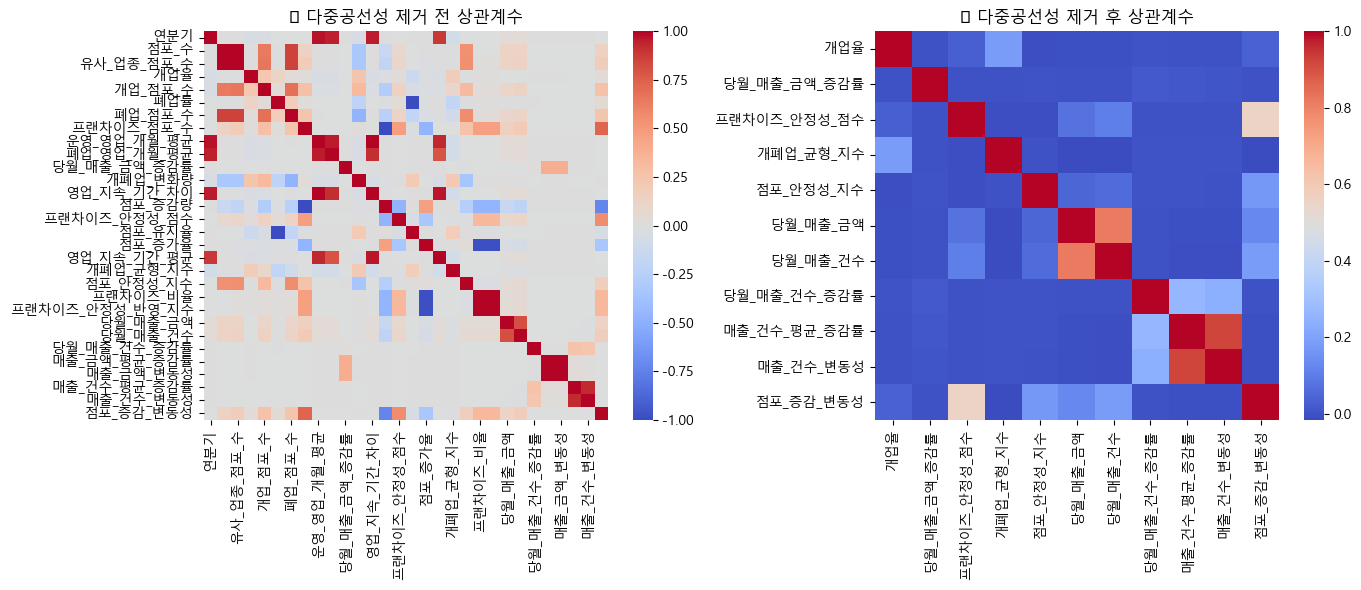

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 파일 경로 설정
file_path = r"C:\Users\m\Downloads\매출-안정성 데이터_추가완료.csv"

# 데이터 로드
df = pd.read_csv(file_path)

# 숫자형 변수만 선택
numeric_cols = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_cols].dropna()  # 결측치 제거

# 다중공선성 검사를 위한 VIF 계산 함수
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data.sort_values(by="VIF", ascending=False)

# 1️⃣ VIF 계산
vif_result = calculate_vif(df_numeric)
print("📌 초기 VIF 결과:\n", vif_result)

# 2️⃣ VIF 값이 10 이상인 변수 제거 (다중공선성 해결)
threshold = 10  # VIF 기준값
high_vif_features = vif_result[vif_result["VIF"] > threshold]["Feature"].tolist()
df_reduced = df_numeric.drop(columns=high_vif_features)

# 3️⃣ 다중공선성이 해결되었는지 다시 VIF 계산
vif_result_reduced = calculate_vif(df_reduced)
print("\n✅ 다중공선성 제거 후 VIF 결과:\n", vif_result_reduced)

# 4️⃣ 상관관계 히트맵 (변수 제거 전/후 비교)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(df_numeric.corr(), annot=False, cmap="coolwarm")
plt.title("📊 다중공선성 제거 전 상관계수")

plt.subplot(1, 2, 2)
sns.heatmap(df_reduced.corr(), annot=False, cmap="coolwarm")
plt.title("✅ 다중공선성 제거 후 상관계수")

plt.tight_layout()
plt.show()

In [22]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

# 데이터 로드
df = pd.read_csv(r"C:\Users\m\Downloads\매출-안정성 데이터_추가완료.csv")  # 실제 파일 경로로 변경

# 숫자형 데이터만 추출
df_numeric = df.select_dtypes(include=["number"])

# 타겟 변수 설정 (예: "당월_매출_금액"이 목표 변수)
target_column = "당월_매출_금액"
target = df_numeric[target_column]

# 특성 변수 설정 (목표 변수를 제외한 나머지)
features = df_numeric.drop(columns=[target_column])

# 결측값 확인 및 처리
print(f"결측치 개수:\n{features.isnull().sum()}")  # 어디에 NaN이 있는지 확인
features = features.fillna(features.median())  # NaN을 중앙값으로 대체

# 상호정보량 계산
mi_scores = mutual_info_regression(features, target)

# 결과 출력
mi_df = pd.DataFrame({"Feature": features.columns, "MI Score": mi_scores})
mi_df = mi_df.sort_values(by="MI Score", ascending=False)

print(mi_df)

결측치 개수:
연분기                  0
점포_수                 0
유사_업종_점포_수           0
개업율                  0
개업_점포_수              0
폐업률                  0
폐업_점포_수              0
프랜차이즈_점포_수           0
운영_영업_개월_평균          0
폐업_영업_개월_평균          0
당월_매출_금액_증감률         0
개폐업_변화량              0
영업_지속_기간_차이          0
점포_증감량               0
프랜차이즈_안정성_점수         0
점포_유지율               0
점포_증가율               0
영업_지속_기간_평균          0
개폐업_균형_지수            0
점포_안정성_지수            0
프랜차이즈_비율             0
프랜차이즈_안정성_반영_지수      0
당월_매출_건수             0
당월_매출_건수_증감률         0
매출_금액_평균_증감률         0
매출_금액_변동성          986
매출_건수_평균_증감률         0
매출_건수_변동성          986
점포_증감_변동성          986
dtype: int64
            Feature   MI Score
23     당월_매출_건수_증감률  10.282615
10     당월_매출_금액_증감률  10.281404
22         당월_매출_건수  10.241056
25        매출_금액_변동성   6.242068
27        매출_건수_변동성   6.223587
26     매출_건수_평균_증감률   6.191124
24     매출_금액_평균_증감률   6.186569
0               연분기   3.035067
17      영업_지속_기간_평균   2.595950
8 

In [23]:
print(df[['매출_금액_변동성', '매출_건수_변동성', '점포_증감_변동성']].describe())
print(df[['매출_금액_변동성', '매출_건수_변동성', '점포_증감_변동성']].value_counts())

          매출_금액_변동성     매출_건수_변동성     점포_증감_변동성
count  1.530895e+06  1.530895e+06  1.530895e+06
mean   1.627772e+02  8.072958e+01  8.559494e-02
std    1.125934e+04  2.768936e+03  2.937263e-01
min    0.000000e+00  2.641732e-03  0.000000e+00
25%    9.556293e+00  9.340852e+00  0.000000e+00
50%    1.396411e+01  1.246085e+01  0.000000e+00
75%    2.105899e+01  1.898599e+01  0.000000e+00
max    1.468269e+06  5.143489e+05  1.110984e+01
매출_금액_변동성  매출_건수_변동성  점포_증감_변동성
8.822311   9.811365   0.0          1470
5.659890   9.620608   0.0          1449
12.907933  10.289016  0.0          1428
7.357552   7.562477   0.0          1407
10.040840  8.512826   0.0          1407
                                   ... 
8.544188   5.979261   0.0             2
24.821600  27.600258  0.0             2
8.541400   19.803373  0.0             2
8.509201   6.608628   0.0             2
10.384512  7.594661   0.0             2
Name: count, Length: 28005, dtype: int64


In [24]:
print(df[['매출_금액_변동성', '매출_건수_변동성', '점포_증감_변동성']].isna().sum())
print(df[['매출_금액_변동성', '매출_건수_변동성', '점포_증감_변동성']].eq(0).sum())  # 0인 값 개수 확인

매출_금액_변동성    986
매출_건수_변동성    986
점포_증감_변동성    986
dtype: int64
매출_금액_변동성         20
매출_건수_변동성          0
점포_증감_변동성    1323483
dtype: int64


In [25]:
df[df['매출_금액_변동성'].isna()]['연분기'].value_counts().sort_index()

연분기
20192    387
20193      2
20194      4
20201      8
20202      3
20203      1
20204      2
20211      1
20212      1
20213      1
20214      3
20221      2
20223      1
20224      1
20231      2
20232      5
20233      3
20234      6
20241     68
20242    485
Name: count, dtype: int64

In [26]:
prev_quarter = df['연분기'].astype(int) - 1
df_missing = df[df['매출_금액_변동성'].isna()]
df_prev = df[df['연분기'].astype(int).isin(prev_quarter)]
missing_prev = df_missing[~df_missing['연분기'].astype(int).isin(df_prev['연분기'].astype(int))]
print(missing_prev[['연분기', '매출_금액_변동성']])

           연분기  매출_금액_변동성
294347   20194        NaN
313809   20242        NaN
354070   20194        NaN
379332   20194        NaN
392429   20194        NaN
...        ...        ...
1476769  20234        NaN
1504335  20234        NaN
1513260  20234        NaN
1531729  20234        NaN
1531731  20234        NaN

[501 rows x 2 columns]


결측치를 처리한 새로운 파일로 저장

In [27]:
import pandas as pd

# 데이터 불러오기
file_path = "C:\\Users\\m\\Downloads\\매출-안정성 데이터_추가완료.csv"
df = pd.read_csv(file_path)

# 2019년 초반(20192, 20193) 결측치는 0으로 채우기
df.loc[df['연분기'].isin([20192, 20193]), ['매출_금액_변동성', '매출_건수_변동성', '점포_증감_변동성']] = df.loc[df['연분기'].isin([20192, 20193]), ['매출_금액_변동성', '매출_건수_변동성', '점포_증감_변동성']].fillna(0)

# 2024년 데이터(20241, 20242)는 전 분기 값으로 채우기 (ffill)
df.sort_values(by=['연분기'], inplace=True)  # 연분기 기준 정렬
df[['매출_금액_변동성', '매출_건수_변동성', '점포_증감_변동성']] = df[['매출_금액_변동성', '매출_건수_변동성', '점포_증감_변동성']].fillna(method='ffill')

# 그래도 남아있는 NaN 값 제거
df.dropna(subset=['매출_금액_변동성', '매출_건수_변동성', '점포_증감_변동성'], inplace=True)

# 결과 저장
output_path = "C:\\Users\\m\\Downloads\\매출-안정성 데이터_결측치처리완료.csv"
df.to_csv(output_path, index=False)

print(f"결측치 처리 완료! 저장된 파일: {output_path}")

C:\Users\m\AppData\Local\Temp\ipykernel_11480\2773115568.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[['매출_금액_변동성', '매출_건수_변동성', '점포_증감_변동성']] = df[['매출_금액_변동성', '매출_건수_변동성', '점포_증감_변동성']].fillna(method='ffill')


결측치 처리 완료! 저장된 파일: C:\Users\m\Downloads\매출-안정성 데이터_결측치처리완료.csv


다시 분석 시작

영업_지속_기간_평균        1.000000
영업_지속_기간_차이        0.968550
운영_영업_개월_평균        0.931642
연분기                0.886078
폐업_영업_개월_평균        0.790741
당월_매출_건수           0.042110
당월_매출_금액           0.030560
점포_증감량             0.006758
당월_매출_건수_증감률       0.005651
당월_매출_금액_증감률       0.004761
점포_증가율             0.004517
매출_금액_평균_증감률       0.002659
매출_금액_변동성          0.002492
폐업_점포_수            0.002267
폐업률                0.001796
매출_건수_평균_증감률       0.000961
점포_수               0.000541
매출_건수_변동성          0.000388
유사_업종_점포_수         0.000191
점포_안정성_지수         -0.000043
점포_유지율            -0.001796
점포_증감_변동성         -0.002528
프랜차이즈_안정성_반영_지수   -0.004166
프랜차이즈_비율          -0.004166
프랜차이즈_안정성_점수      -0.005777
프랜차이즈_점포_수        -0.006758
개업_점포_수           -0.027302
개업율               -0.029413
개폐업_변화량           -0.035785
개폐업_균형_지수         -0.082533
Name: 영업_지속_기간_평균, dtype: float64


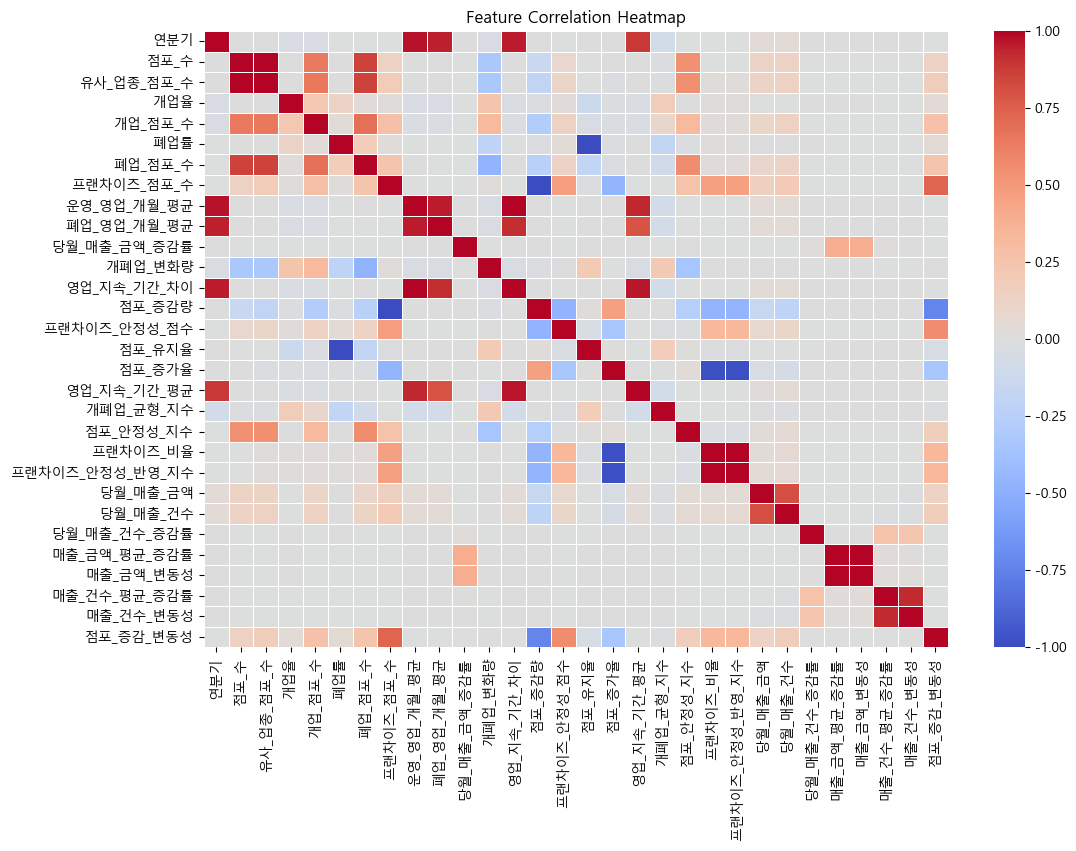

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
file_path = r"C:\Users\m\Downloads\매출-안정성 데이터_추가완료.csv"
df = pd.read_csv(file_path)

# 숫자형 변수만 추출
numeric_df = df.select_dtypes(include=['number'])

# 상관계수 계산
correlation_matrix = numeric_df.corr()

# '영업_지속_기간_평균'과의 상관관계 정렬
target_corr = correlation_matrix["영업_지속_기간_평균"].sort_values(ascending=False)

# 결과 출력
print(target_corr)

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 데이터 로드 (사용자의 데이터 경로에 맞게 수정 필요)
data = pd.read_csv("C:/Users/m/Downloads/서울시_상권분석_서비스_매출추가.csv")

# 다중공선성 분석을 위한 데이터 선택
X = data.select_dtypes(include=[np.number])  # 수치형 변수만 선택

# VIF 계산 함수
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# 초기 VIF 계산
vif_df = calculate_vif(X)
print("초기 VIF 결과:")
print(vif_df.sort_values(by='VIF', ascending=False))

# VIF가 10 이상인 변수 제거
def remove_high_vif(df, threshold=10):
    while True:
        vif_df = calculate_vif(df)
        max_vif = vif_df["VIF"].max()
        if max_vif < threshold:
            break
        drop_feature = vif_df.loc[vif_df["VIF"] == max_vif, "Feature"].values[0]
        print(f"제거된 변수: {drop_feature} (VIF={max_vif})")
        df = df.drop(columns=[drop_feature])
    return df

# 다중공선성 제거 후 변수 선택
X_filtered = remove_high_vif(X)
print("최종 선택된 변수:", X_filtered.columns.tolist())

# 상관관계 분석
target_var = "영업_지속_기간_평균"
corr_threshold = 0.3  # 절댓값 기준

correlations = X_filtered.corr()[target_var]
selected_features = correlations[correlations.abs() >= corr_threshold].index.tolist()

print("영업_지속_기간_평균과 높은 상관관계를 가진 변수들:")
print(selected_features)

c:\Users\m\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


초기 VIF 결과:
           Feature          VIF
1             점포_수          inf
2       유사_업종_점포_수          inf
7       프랜차이즈_점포_수          inf
0              연분기  4036.746904
9   서울_폐업_영업_개월_평균    11.494924
8   서울_운영_영업_개월_평균    11.221533
6          폐업_점포_수     7.335951
4          개업_점포_수     2.836781
10           매출_금액     1.481646
5              폐업률     1.342033
11           매출_건수     1.276703
3              개업율     1.224966
12           유동인구수     1.039732


c:\Users\m\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


제거된 변수: 점포_수 (VIF=inf)
제거된 변수: 연분기 (VIF=4036.746903645477)
제거된 변수: 서울_폐업_영업_개월_평균 (VIF=2902.7393331920716)
최종 선택된 변수: ['유사_업종_점포_수', '개업율', '개업_점포_수', '폐업률', '폐업_점포_수', '프랜차이즈_점포_수', '서울_운영_영업_개월_평균', '매출_금액', '매출_건수', '유동인구수']


KeyError: '영업_지속_기간_평균'